In [2]:
import numpy as np
import matplotlib.pyplot as plt

class phonon_2D:
    def __init__(self, omega, q, n, m):
        self.omega = omega
        self.q = q
        self.n = n
        self.m = m
    
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [239]:
# Define the dynamical matrix of 2D square lattice
#! Beaware of the mass term. This is the same mass case but you can generalize this model to different mass case.
# See Alex's HW solution or the RUMs paper


K = 1  # spring constant.
a = 1  # lattice constant.

def dyn_mat(p, q):
    """
    Defining the dynamical matrix for 3 degrees of freedom in 2D system.

    Args:
        p (float): kx-point
        q (float): ky_point
    """
    alpha = (np.cos(2*np.pi*p) + np.cos(2*np.pi*q))/2
    beta = 1j*a*np.sin(2*np.pi*q)
    gamma = 1j*a*np.sin(2*np.pi*p)
    
    dynamical_mat = np.array([[4*K*(1-alpha), 0, beta*K],
                        [0, 4*K*(1-alpha), -gamma*K],
                            [-beta*K, gamma*K, K*((a)**2)*(1+alpha)]])
    return dynamical_mat
    

def diag_mat(k1 = (0, 0), k2 = (0, 0.5), n_kpts = 10):
    """
    diagonalizing the dynamical matrix, with the 

    Args:
        dyn_mat (numpy array): define the dynamical matrix that you're interested in. The dynamical matrix has to be diagonalized for each k-point to plot the phonon band dispersion.
        k1 : beginning of the k-path
        k2 : ending of the k-path
        n : number of k-points in the path
    """
    k_path = np.array([np.linspace(k1[0], k2[0], n_kpts), np.linspace(k1[1], k2[1], n_kpts)])
    eig = np.zeros((n_kpts, 3), dtype=complex) # for each k-point, there are 3 eigenvalues. #! Three eigenvalues is coming from 3 degrees of freedom in 2D system.
    
    for i in range(0,n_kpts):
        p = k_path[0,i]
        q = k_path[1,i]
        # print(p,q)
        # dyn_mat_local = dyn_mat(p,q)
        eig_local = np.linalg.eigvals(dyn_mat(p,q))
        eig[i,:] += eig_local
    return np.sqrt(eig) # The eigenvalues are frequency squared. So, taking the square root of the eigenvalues to get the frequency.
    



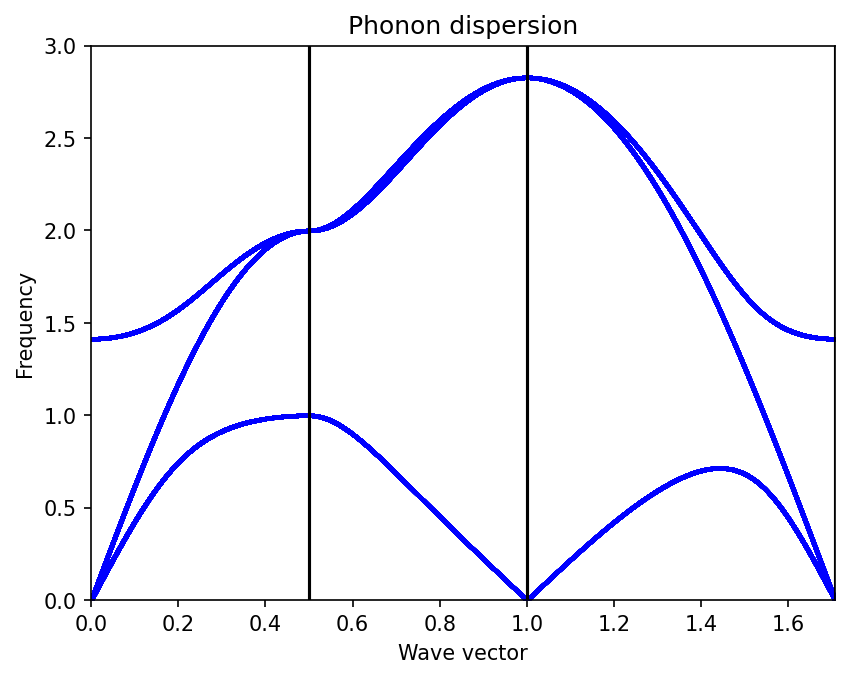

In [241]:
import matplotlib.pyplot as plt
# Calculate eigenvalues

eigenval_1 = diag_mat(k1 = (0, 0), k2 = (0, 0.5), n_kpts = 10000)
k_points_1 = np.linspace(0, np.sqrt((0 - 0)**2 + (0.5 - 0.0)**2), 10000)

eigenval_2 = diag_mat(k1 = (0, 0.5), k2 = (0.5, 0.5), n_kpts = 10000)
k_points_2 = np.max(k_points_1) + np.linspace(0, np.sqrt((0.5 - 0)**2 + (0.5 - 0.5)**2), 10000)

eigenval_3 = diag_mat(k1 = (0.5, 0.5), k2 = (0, 0), n_kpts = 10000)
k_points_3 = np.max(k_points_2) + np.linspace(0, np.sqrt((0.5 - 0)**2 + (0.5 - 0.0)**2), 10000)

plt.figure(dpi=150)
# Plot each band
for i in range(eigenval_1.shape[1]):
    plt.plot(k_points_1, eigenval_1[:, i].real, 'bo', markersize=1,label=f'Band {i+1}')

for i in range(eigenval_2.shape[1]):
    plt.plot(k_points_2, eigenval_2[:, i].real, 'bo', markersize=1,label=f'Band {i+1}')
    
for i in range(eigenval_3.shape[1]):
    plt.plot(k_points_3, eigenval_3[:, i].real, 'bo', markersize=1,label=f'Band {i+1}')

# Add horizontal lines at the zone boundaries
plt.axvline(np.max(k_points_1), color='k', linestyle='-')  # Add this line
plt.axvline(np.max(k_points_2), color='k', linestyle='-')  # Add this line
plt.axvline(np.max(k_points_3), color='k', linestyle='-')  # Add this line

plt.xlim(0, np.max(k_points_3))
plt.ylim(0, 3)   # Y-axis range
plt.xlabel('Wave vector')
plt.ylabel('Frequency')
plt.title('Phonon dispersion')
# plt.legend()
plt.show()